# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from tabulate import tabulate
import numpy as np

## Importing Algorithms from ipynb

In [2]:
import import_ipynb
import Multiple_Linear_Regression as mlr
import RidgeRegression as rr
import SupportVectorRegressor as svr
import decisionTree as dt

importing Jupyter notebook from Multiple_Linear_Regression.ipynb
importing Jupyter notebook from RidgeRegression.ipynb
importing Jupyter notebook from SupportVectorRegressor.ipynb
Instructions for updating:
non-resource variables are not supported in the long term
importing Jupyter notebook from decisionTree.ipynb


# Loading the raw data

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car_data.csv')

In [4]:
car_dataset.head(10)

,Unnamed: 0,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0,ritz,2015,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,1,sx4,2014,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,ciaz,2018,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,3,wagon r,2012,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4,swift,2015,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,5,vitara brezza,2019,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,6,ciaz,2016,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,7,s cross,2016,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,8,ciaz,2017,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,9,ciaz,2016,7.45,8.92,42367,Diesel,Dealer,Manual,0


# Preprocessing

In [5]:
car_dataset.shape

(301, 10)

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     301 non-null    int64  
 1   Car_Name       301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 23.6+ KB


In [7]:
#Exploring the descriptive statistics of the variables
car_dataset.describe()

,Unnamed: 0,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,150.000000,2014.627907,4.661296,7.628472,36947.205980,0.043189
std,87.035433,2.891554,5.082812,8.644115,38886.883882,0.247915
min,0.000000,2004.000000,0.100000,0.320000,500.000000,0.000000
25%,75.000000,2013.000000,0.900000,1.200000,15000.000000,0.000000
50%,150.000000,2015.000000,3.600000,6.400000,32000.000000,0.000000
75%,225.000000,2017.000000,6.000000,9.900000,48767.000000,0.000000
max,300.000000,2019.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
#Check for any missing value in data set and treat it
car_dataset.isnull().sum()

Unnamed: 0       0
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#skewness and kurtosis
print("Skewness: %f" % car_dataset['Selling_Price'].skew())
print("Kurtosis: %f" % car_dataset['Selling_Price'].kurt())

Skewness: 2.493422
Kurtosis: 8.902970


# Feature Extraction

In [10]:
# Creating a new feature called total no. of years old my car,bcz It's important to know how many years old the car is.
car_dataset['Car_age'] = 2021-car_dataset['Year']

#It's time to drop the Year column after the needed info is derived.
car_dataset.drop(labels='Year',axis=1,inplace=True)

In [11]:
car_dataset.head(10)

,Unnamed: 0,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
5,5,vitara brezza,9.25,9.83,2071,Diesel,Dealer,Manual,0,2
6,6,ciaz,6.75,8.12,18796,Petrol,Dealer,Manual,0,5
7,7,s cross,6.50,8.61,33429,Diesel,Dealer,Manual,0,5
8,8,ciaz,8.75,8.89,20273,Diesel,Dealer,Manual,0,4
9,9,ciaz,7.45,8.92,42367,Diesel,Dealer,Manual,0,5


# Data exploration

C:\Users\chala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


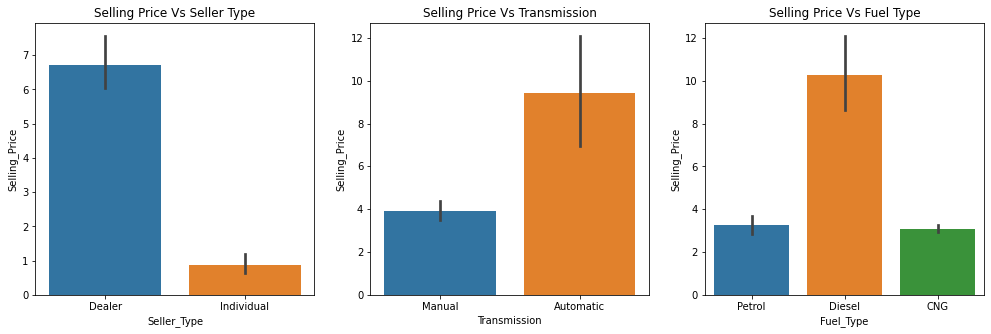

In [12]:
#Seller Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(car_dataset['Seller_Type'], car_dataset['Selling_Price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(car_dataset['Transmission'],car_dataset['Selling_Price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(car_dataset['Fuel_Type'],car_dataset['Selling_Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

C:\Users\chala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


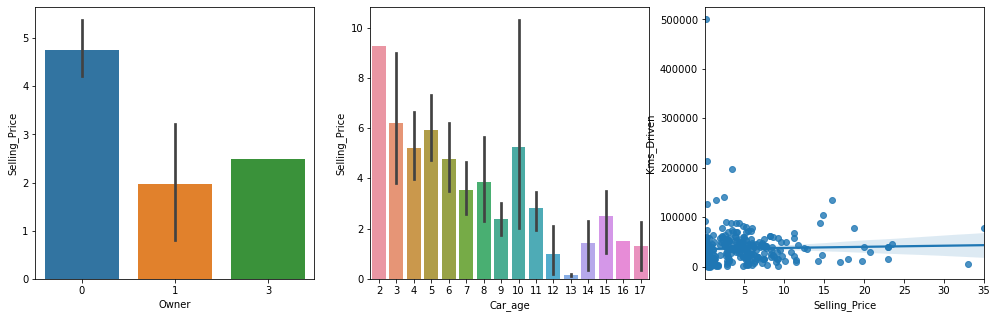

In [13]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(car_dataset['Owner'],car_dataset['Selling_Price'])

plt.subplot(1,3,2)
sns.barplot(car_dataset['Car_age'],car_dataset['Selling_Price'])

plt.subplot(1,3,3)
sns.regplot(car_dataset['Selling_Price'],car_dataset['Kms_Driven'])
plt.show()

C:\Users\chala\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


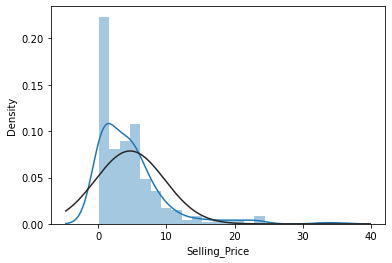

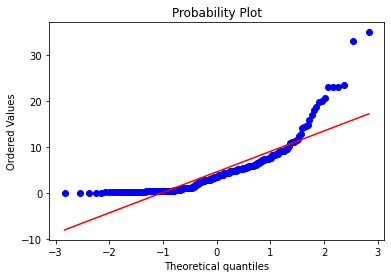

In [14]:
# Distribution of prices
from scipy.stats import norm
from scipy import stats

# Using Histogram and normal probability plot
sns.distplot(car_dataset['Selling_Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(car_dataset['Selling_Price'], plot=plt)

C:\Users\chala\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


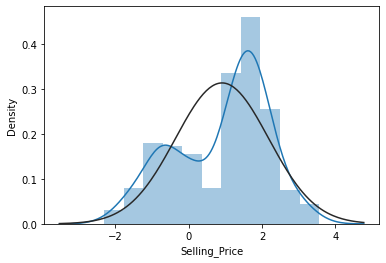

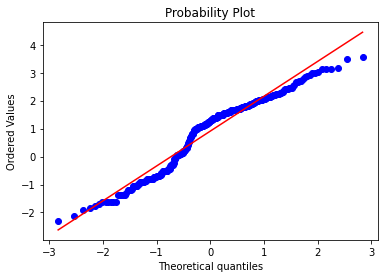

In [15]:
#applying log transformation
car_dataset['Selling_Price'] = np.log(car_dataset['Selling_Price'])
#transformed histogram and normal probability plot
sns.distplot(car_dataset['Selling_Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(car_dataset['Selling_Price'], plot=plt)

In [16]:
#Dealing with categorical variables
# Here's our categorical column
print(car_dataset['Fuel_Type'].unique())
print(car_dataset['Seller_Type'].unique())
print(car_dataset['Transmission'].unique())
print(car_dataset['Car_Name'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 

In [17]:
# In Car Name column There are three hundred and twelve unique name. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
car_dataset = car_dataset.drop(labels='Car_Name', axis=1)

In [18]:
# Dealing With Categorical Variables, creagting dummie
clean_data = pd.get_dummies(car_dataset,drop_first=True)
clean_data = clean_data.drop(labels='Unnamed: 0', axis=1)
clean_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,1.208960,5.59,27000,0,6,0,1,0,1
1,1.558145,9.54,43000,0,7,1,0,0,1
2,1.981001,9.85,6900,0,3,0,1,0,1
3,1.047319,4.15,5200,0,9,0,1,0,1
4,1.526056,6.87,42450,0,6,1,0,0,1


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Kms_Driven','Owner','Car_age','Fuel_Type_Diesel',
                        'Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.201728,Present_Price
1,2.892026,Kms_Driven
2,1.087990,Owner
3,8.540393,Car_age
4,4.714762,Fuel_Type_Diesel
5,13.341429,Fuel_Type_Petrol
6,2.230179,Seller_Type_Individual
7,8.368965,Transmission_Manual


In [20]:
# Car_age nd fuel_type_petrol feature has high VIF
data_no_multicolinearity = clean_data.drop(['Kms_Driven','Fuel_Type_Petrol'],axis=1)

In [21]:
# cheking again after removing some correlated feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Present_Price','Owner','Car_age','Fuel_Type_Diesel',
                        'Seller_Type_Individual','Transmission_Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.456996,Present_Price
1,1.084141,Owner
2,4.810633,Car_age
3,1.658039,Fuel_Type_Diesel
4,1.864471,Seller_Type_Individual
5,3.964982,Transmission_Manual


# Feature Selection

<AxesSubplot:>

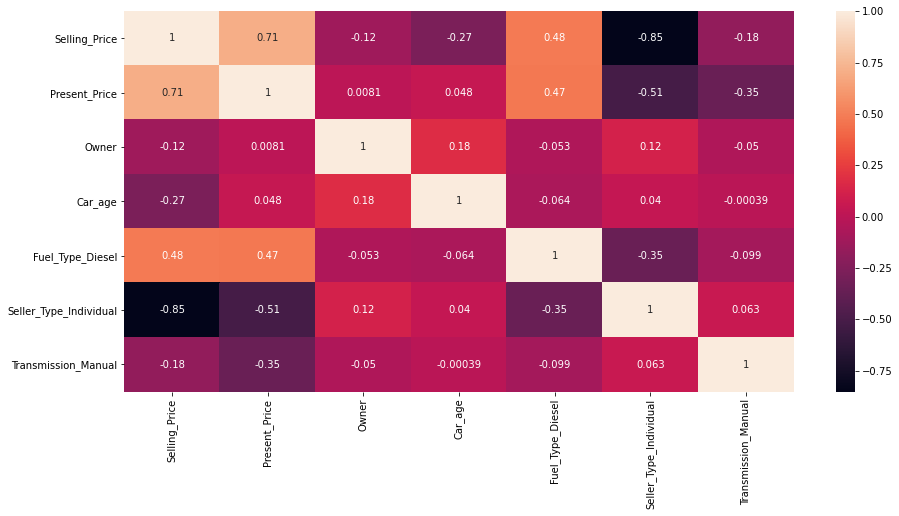

In [22]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

In [23]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values
from sklearn.feature_selection import f_regression,SelectKBest

X = data_no_multicolinearity.drop('Selling_Price',axis=1)
y = data_no_multicolinearity['Selling_Price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3) # This output in scincetific notation array lets convert them using 'round' method

array([0.   , 0.042, 0.   , 0.   , 0.   , 0.002])

In [24]:
# Creating summary table
model_summry = pd.DataFrame(data=['Present_Price','Owner','Car_age','Fuel_Type_Diesel',
                        'Seller_Type_Individual','Transmission_Manual'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry.head()

,Features,p-values
0,Present_Price,0.000
1,Owner,0.042
2,Car_age,0.000
3,Fuel_Type_Diesel,0.000
4,Seller_Type_Individual,0.000


In [25]:
# Selecting useful features.
final_df = data_no_multicolinearity[['Selling_Price', 'Present_Price', 'Car_age',
       'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Transmission_Manual']]

In [26]:
final_df.head(10)

,Selling_Price,Present_Price,Car_age,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,1.208960,5.59,6,0,0,1
1,1.558145,9.54,7,1,0,1
2,1.981001,9.85,3,0,0,1
3,1.047319,4.15,9,0,0,1
4,1.526056,6.87,6,1,0,1
5,2.224624,9.83,2,1,0,1
6,1.909543,8.12,5,0,0,1
7,1.871802,8.61,5,1,0,1
8,2.169054,8.89,4,1,0,1
9,2.008214,8.92,5,1,0,1


# Model Development

In [27]:
X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

### Feature Scaling

In [28]:
# feature scallng on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['Present_Price','Car_age']])

input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

In [29]:
X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

### Training and Testing Data

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=365)

## Metrics functions

In [31]:
def mean_squared_error(y_pred, y_real):
    N = y_pred.shape[0]

    error = np.sum((y_pred - y_real)**2)/(2*N)

    return error


In [32]:
def r2_score(Y_test, Y_pred):
    data_var = np.sum((Y_test-np.mean(Y_test,axis=0))**2)
    model_var = np.sum((Y_pred-Y_test)**2)
    expl_var = data_var-model_var
    return float(expl_var/data_var)

# Multiple Linear Regression

In [33]:
model = mlr.Multiple_Linear_Regression()
model.fit(x_train,y_train)

In [34]:
# Test for trained
training_data_prediction = model.predict(x_train)
train_r_squared = r2_score(y_train,training_data_prediction) #r_squared error
train_mse = mean_squared_error(y_train,training_data_prediction) #Mean squared error
train_rmse = np.sqrt(mean_squared_error(y_train,training_data_prediction)) #Root mean square error

# Test for evaluation
training_data_prediction = model.predict(x_test)
test_r_squared = r2_score(y_test,training_data_prediction)
test_mse = mean_squared_error(y_test,training_data_prediction)
test_rmse = np.sqrt(mean_squared_error(y_test,training_data_prediction))

In [35]:
training_data_prediction = model.predict(x_test)
r_squared = r2_score(y_test,training_data_prediction)
r_squared

errors = [["Train",train_r_squared,train_mse,train_rmse],
         ["Test",test_r_squared,test_mse,test_rmse]]
errors
#define header names
col_names = ["", "R Squared Error", "Mean Square Error", "Root Mean Square Error"]
  
#display table
print(tabulate(errors, headers=col_names, tablefmt="fancy_grid"))

╒═══════╤═══════════════════╤═════════════════════╤══════════════════════════╕
│       │   R Squared Error │   Mean Square Error │   Root Mean Square Error │
╞═══════╪═══════════════════╪═════════════════════╪══════════════════════════╡
│ Train │          0.912251 │           0.0699519 │                 0.264484 │
├───────┼───────────────────┼─────────────────────┼──────────────────────────┤
│ Test  │          0.715207 │           0.220141  │                 0.469192 │
╘═══════╧═══════════════════╧═════════════════════╧══════════════════════════╛


# Ridge Regression 

In [36]:
ridge_obj = rr.RidgeRegression(iterations = 1000, learning_rate = 0.01, l2_penality = 80)
ridge_obj.fit(x_train,y_train)
predictions = ridge_obj.predict(x_train)

train_r_squared = r2_score(y_train,predictions) #r_squared error
train_mse = mean_squared_error(y_train,predictions) #Mean squared error
train_rmse = np.sqrt(mean_squared_error(y_train,predictions)) #Root mean square error

predictions = ridge_obj.predict(x_test)
test_r_squared = r2_score(y_test,predictions)
test_mse = mean_squared_error(y_test,predictions)
test_rmse = np.sqrt(mean_squared_error(y_test,predictions))

In [37]:
errors = [["Train",train_r_squared,train_mse,train_rmse],
         ["Test",test_r_squared,test_mse,test_rmse]]
errors
#define header names
col_names = ["", "R Squared Error", "Mean Square Error", "Root Mean Square Error"]
  
#display table
print(tabulate(errors, headers=col_names, tablefmt="fancy_grid"))

╒═══════╤═══════════════════╤═════════════════════╤══════════════════════════╕
│       │   R Squared Error │   Mean Square Error │   Root Mean Square Error │
╞═══════╪═══════════════════╪═════════════════════╪══════════════════════════╡
│ Train │          0.783578 │            0.172527 │                 0.415363 │
├───────┼───────────────────┼─────────────────────┼──────────────────────────┤
│ Test  │          0.70475  │            0.228224 │                 0.477728 │
╘═══════╧═══════════════════╧═════════════════════╧══════════════════════════╛


# Support Vector Regressor 

In [38]:
svr = svr.SVR()
svr.fit(x_train,y_train)
predicted = svr.predict(x_train)

1/1000: loss: 2.5046212673187256
2/1000: loss: 2.494083881378174
3/1000: loss: 2.48360538482666
4/1000: loss: 2.4731438159942627
5/1000: loss: 2.462698459625244
6/1000: loss: 2.4522697925567627
7/1000: loss: 2.4418575763702393
8/1000: loss: 2.431462526321411
9/1000: loss: 2.42108416557312
10/1000: loss: 2.4107232093811035
11/1000: loss: 2.400379180908203
12/1000: loss: 2.3900527954101562
13/1000: loss: 2.3797435760498047
14/1000: loss: 2.3694519996643066
15/1000: loss: 2.359182357788086
16/1000: loss: 2.34896183013916
17/1000: loss: 2.338759422302246
18/1000: loss: 2.3285748958587646
19/1000: loss: 2.318408489227295
20/1000: loss: 2.308260440826416
21/1000: loss: 2.298130989074707
22/1000: loss: 2.288019895553589
23/1000: loss: 2.2779276371002197
24/1000: loss: 2.2678542137145996
25/1000: loss: 2.2577996253967285
26/1000: loss: 2.2477641105651855
27/1000: loss: 2.23774790763855
28/1000: loss: 2.2277512550354004
29/1000: loss: 2.2177741527557373
30/1000: loss: 2.2078166007995605
31/1000

366/1000: loss: 0.6474670171737671
367/1000: loss: 0.646786630153656
368/1000: loss: 0.6461116075515747
369/1000: loss: 0.6454416513442993
370/1000: loss: 0.6447769999504089
371/1000: loss: 0.6441173553466797
372/1000: loss: 0.643463134765625
373/1000: loss: 0.6428253650665283
374/1000: loss: 0.6421923041343689
375/1000: loss: 0.6415641903877258
376/1000: loss: 0.64094078540802
377/1000: loss: 0.640322208404541
378/1000: loss: 0.6397082209587097
379/1000: loss: 0.6390988826751709
380/1000: loss: 0.6384940147399902
381/1000: loss: 0.6378937363624573
382/1000: loss: 0.6372978687286377
383/1000: loss: 0.6367063522338867
384/1000: loss: 0.6361219882965088
385/1000: loss: 0.6355506181716919
386/1000: loss: 0.6349833011627197
387/1000: loss: 0.6344202756881714
388/1000: loss: 0.6338629722595215
389/1000: loss: 0.633313000202179
390/1000: loss: 0.6327672004699707
391/1000: loss: 0.6322269439697266
392/1000: loss: 0.6316943764686584
393/1000: loss: 0.6311658620834351
394/1000: loss: 0.63064134

644/1000: loss: 0.5749815702438354
645/1000: loss: 0.5748902559280396
646/1000: loss: 0.5747994184494019
647/1000: loss: 0.5747089982032776
648/1000: loss: 0.5746185779571533
649/1000: loss: 0.5745285153388977
650/1000: loss: 0.5744390487670898
651/1000: loss: 0.5743495225906372
652/1000: loss: 0.5742602348327637
653/1000: loss: 0.5741714835166931
654/1000: loss: 0.5740828514099121
655/1000: loss: 0.5739943981170654
656/1000: loss: 0.5739061832427979
657/1000: loss: 0.573818564414978
658/1000: loss: 0.5737308263778687
659/1000: loss: 0.5736433267593384
660/1000: loss: 0.5735572576522827
661/1000: loss: 0.5734740495681763
662/1000: loss: 0.5733915567398071
663/1000: loss: 0.573311448097229
664/1000: loss: 0.5732319355010986
665/1000: loss: 0.5731523036956787
666/1000: loss: 0.5730736255645752
667/1000: loss: 0.5729947090148926
668/1000: loss: 0.5729162693023682
669/1000: loss: 0.5728381872177124
670/1000: loss: 0.5727603435516357
671/1000: loss: 0.5726842284202576
672/1000: loss: 0.5726

921/1000: loss: 0.561457633972168
922/1000: loss: 0.5614382028579712
923/1000: loss: 0.5614191293716431
924/1000: loss: 0.5613999366760254
925/1000: loss: 0.5613809823989868
926/1000: loss: 0.5613619685173035
927/1000: loss: 0.5613433122634888
928/1000: loss: 0.5613244771957397
929/1000: loss: 0.5613059997558594
930/1000: loss: 0.5612874031066895
931/1000: loss: 0.5612690448760986
932/1000: loss: 0.5612506866455078
933/1000: loss: 0.5612324476242065
934/1000: loss: 0.5612145066261292
935/1000: loss: 0.5611963868141174
936/1000: loss: 0.56117844581604
937/1000: loss: 0.5611607432365417
938/1000: loss: 0.5611429214477539
939/1000: loss: 0.5611252784729004
940/1000: loss: 0.5611077547073364
941/1000: loss: 0.561090350151062
942/1000: loss: 0.5610729455947876
943/1000: loss: 0.5610556602478027
944/1000: loss: 0.5610384345054626
945/1000: loss: 0.5610213279724121
946/1000: loss: 0.5610044002532959
947/1000: loss: 0.5609873533248901
948/1000: loss: 0.5609705448150635
949/1000: loss: 0.560953

In [39]:
predicted = predicted.flatten()
train_r_squared = r2_score(y_train,predicted) #r_squared error
train_mse = mean_squared_error(y_train,predicted) #Mean squared error
train_rmse = np.sqrt(mean_squared_error(y_train,predicted)) #Root mean square error

predictions = svr.predict(x_test)
predictions = predictions.flatten()
test_r_squared = r2_score(y_test,predictions)
test_mse = mean_squared_error(y_test,predictions)
test_rmse = np.sqrt(mean_squared_error(y_test,predictions))

In [40]:
errors = [["Train",train_r_squared,train_mse,train_rmse],
         ["Test",test_r_squared,test_mse,test_rmse]]
errors
#define header names
col_names = ["", "R Squared Error", "Mean Square Error", "Root Mean Square Error"]
  
#display table
print(tabulate(errors, headers=col_names, tablefmt="fancy_grid"))

╒═══════╤═══════════════════╤═════════════════════╤══════════════════════════╕
│       │   R Squared Error │   Mean Square Error │   Root Mean Square Error │
╞═══════╪═══════════════════╪═════════════════════╪══════════════════════════╡
│ Train │          0.563914 │            0.347639 │                 0.589609 │
├───────┼───────────────────┼─────────────────────┼──────────────────────────┤
│ Test  │          0.636438 │            0.281029 │                 0.530121 │
╘═══════╧═══════════════════╧═════════════════════╧══════════════════════════╛


#  Desicion Tree Regressor

In [41]:
regressor = dt.DecisionTreeRegressor(min_samples_split=3, max_depth=3)
y_trainn = y_train.iloc[:].values.reshape(-1,1)
regressor.fit(x_train,y_trainn)
#regressor.print_tree()

In [42]:
x_trainn = x_train.iloc[:].values
y_trainn = y_train.iloc[:].values.reshape(-1,1)
Y_pred = regressor.predict(x_trainn) 

In [43]:
train_r_squared = r2_score(y_train,Y_pred) #r_squared error
train_mse = mean_squared_error(y_train,Y_pred) #Mean squared error
train_rmse = np.sqrt(mean_squared_error(y_train,Y_pred)) #Root mean square error

x_testt = x_test.iloc[:].values
y_testt = y_test.iloc[:].values.reshape(-1,1)
Y_pred = regressor.predict(x_testt) 

test_r_squared = r2_score(y_test,Y_pred)
test_mse = mean_squared_error(y_test,Y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test,Y_pred))

In [44]:
errors = [["Train",train_r_squared,train_mse,train_rmse],
         ["Test",test_r_squared,test_mse,test_rmse]]
errors
#define header names
col_names = ["", "R Squared Error", "Mean Square Error", "Root Mean Square Error"]
  
#display table
print(tabulate(errors, headers=col_names, tablefmt="fancy_grid"))

╒═══════╤═══════════════════╤═════════════════════╤══════════════════════════╕
│       │   R Squared Error │   Mean Square Error │   Root Mean Square Error │
╞═══════╪═══════════════════╪═════════════════════╪══════════════════════════╡
│ Train │          0.966548 │           0.0266669 │                  0.1633  │
├───────┼───────────────────┼─────────────────────┼──────────────────────────┤
│ Test  │          0.907588 │           0.0714333 │                  0.26727 │
╘═══════╧═══════════════════╧═════════════════════╧══════════════════════════╛


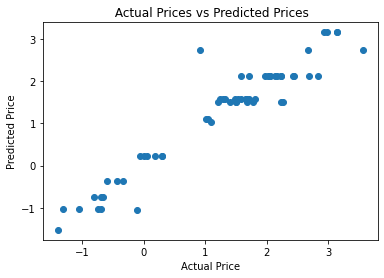

In [45]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()